### Water quality prediction ('water_potability.csv').
- Use any 2 algorithms and try to predict the quality of water. The project must contain all the classification evluation metrics we discussed with an explation of what each metric means. Please do necessary preprocessing if needed.

In [339]:
# Library   
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler

# Model Selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

In [340]:
df = pd.read_csv('water_potability.csv')

In [341]:
df.sample(5)

ph    Hardness        Solids  Chloramines     Sulfate  \
1040  8.124208  207.509515  26489.114701     8.540837  318.059624   
1340  6.441766  174.781849  11306.261505     6.685755         NaN   
1795       NaN  168.963026  21030.234531     5.564002  404.343077   
2658  6.836060  205.667718  18321.327502     6.712854  297.837188   
712   3.681076  144.265270  26726.771113     6.095283         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1040    431.625677       10.075598        63.984225   4.724457           0  
1340    544.354182       17.109829        89.122026   3.682134           0  
1795    440.952071       12.352722        72.033644   4.691018           0  
2658    494.484249       13.808923        70.714225   4.952508           0  
712     564.183824       13.651105        92.299101   3.893070           1

In [342]:
df.shape

(3276, 10)

In [343]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Data Conditioning

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [345]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [346]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [347]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


### 1. Missing Value, Outlier, Duplicated Data Detection
##### Missing Value Detection

In [348]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- There are missing values indicated in the dataset with ph= 491, Sulfate= 781 and Trihalomethane= 162

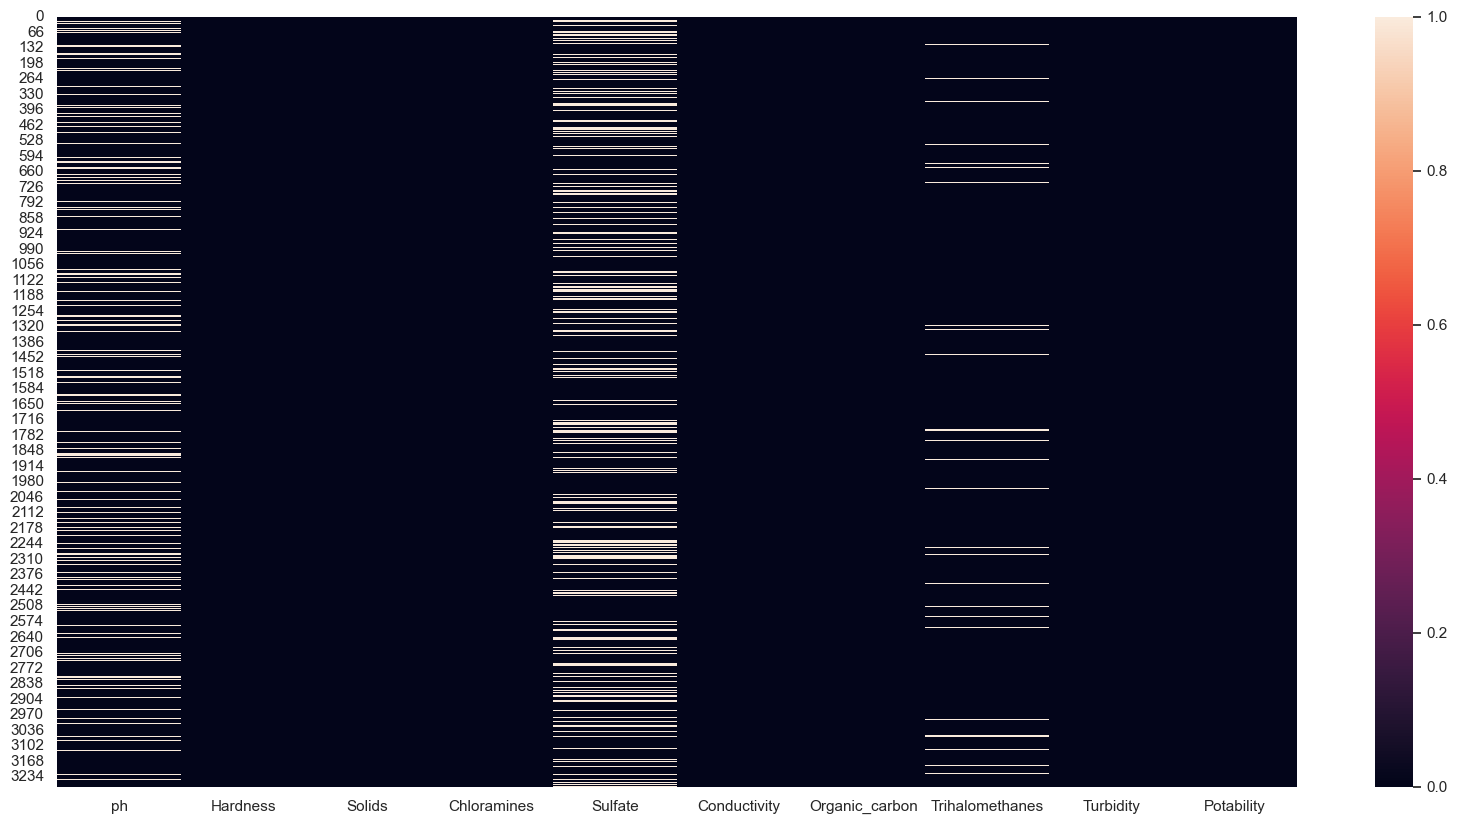

In [349]:
sns.heatmap(df.isnull())
plt.show()

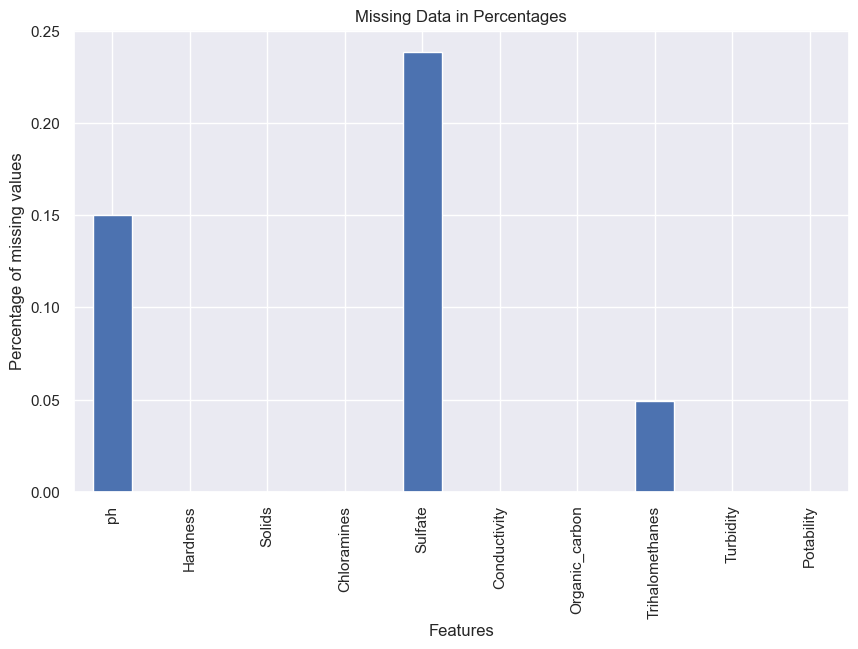

In [350]:
# Calculating the percentage of missng values
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

##### Filling missing values with simple imputer

In [351]:
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

- Median values of the columns are used instead of their mean values as there are outliers in the respective columns

In [352]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

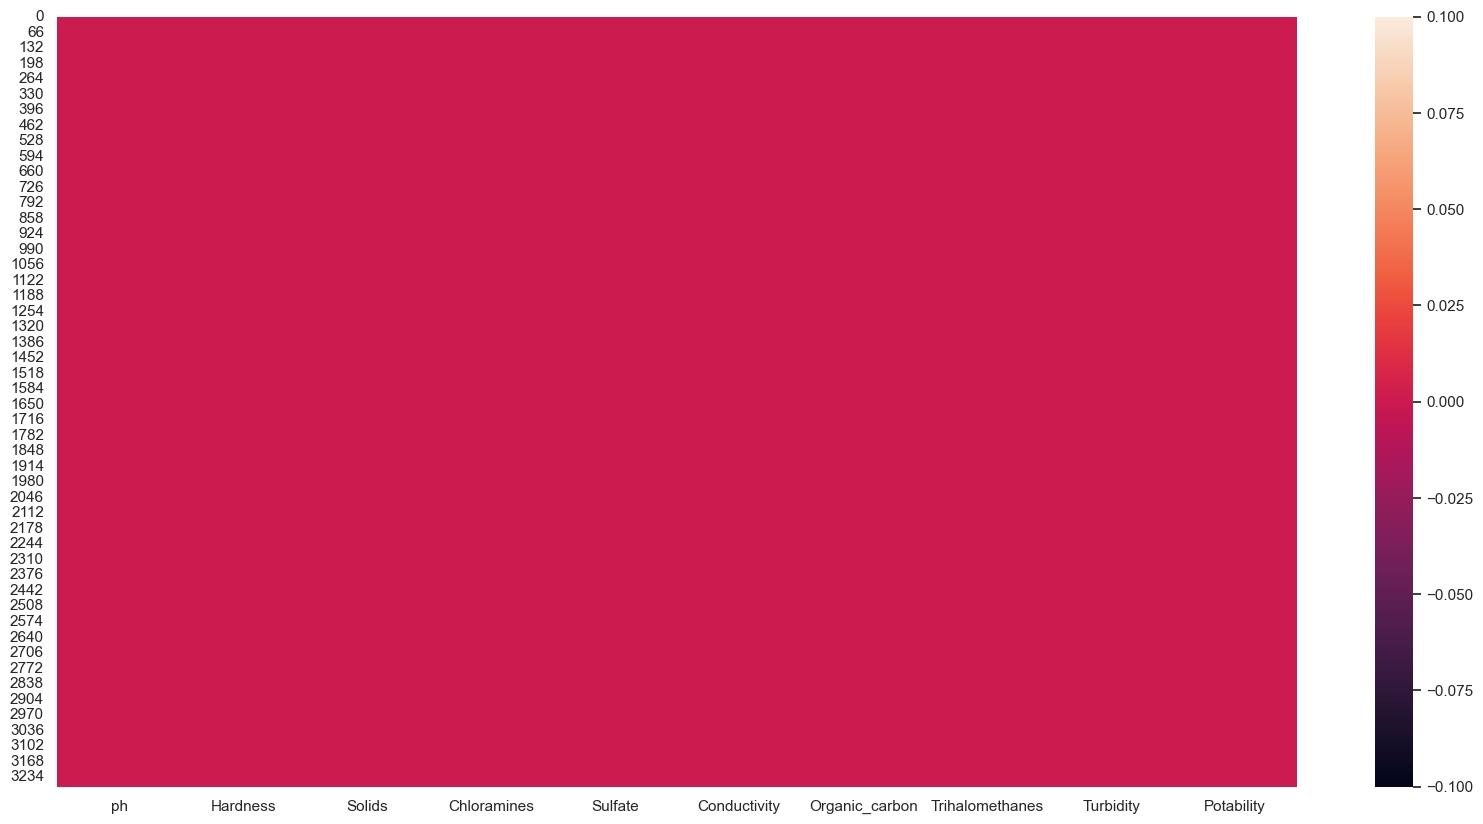

In [353]:
sns.heatmap(df.isnull())
plt.show()

##### Outlier detection

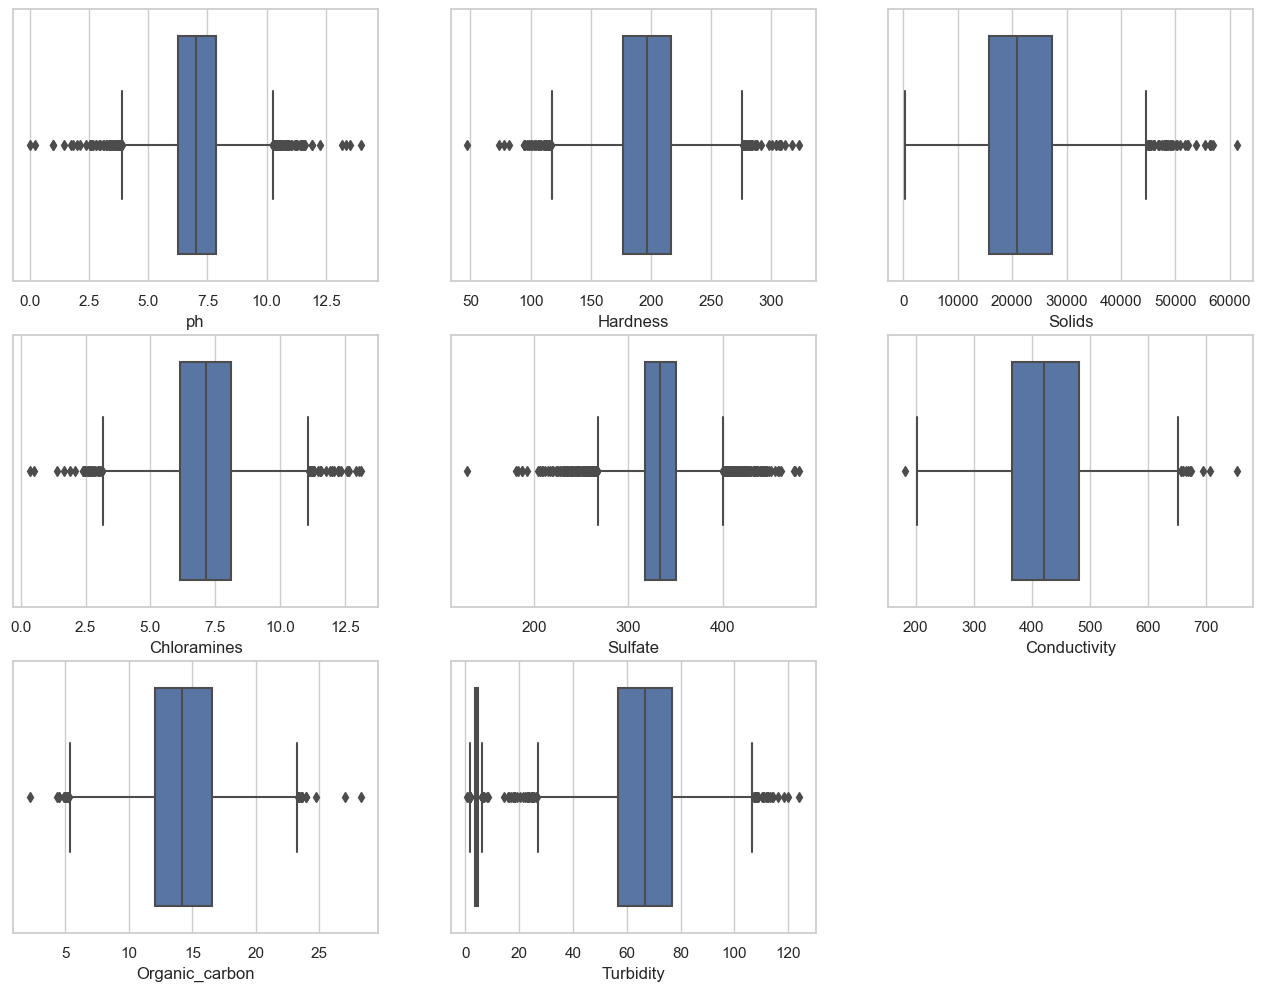

In [354]:
# Visualizing dataset and also checking for outliers 

plt.figure(figsize=(16,12))
sns.set_style(style= 'whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x='ph',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='Hardness', data= df)

plt.subplot(3,3,3)
sns.boxplot(x='Solids', data = df)

plt.subplot(3,3,4)
sns.boxplot(x='Chloramines',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='Sulfate',data =df)

plt.subplot(3,3,6)
sns.boxplot(x='Conductivity',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='Organic_carbon', data= df)

plt.subplot(3,3,8)
sns.boxplot(x='Trihalomethanes', data=df)

plt.subplot(3,3,8)
sns.boxplot(x='Turbidity', data=df)
plt.show()

### Removing Outliers

In [355]:
x = df
quantile = QuantileTransformer()
X = quantile.fit_transform(x)
df_new = quantile.transform(X)
df_new= pd.DataFrame(X)
df_new.columns=['ph', 'Hardness','Solids', 'Chloramines', 'Sulfate', 'Conductivity','Oraganic_carbon','Trihalomethanes', 'Turbidity','potability']
df_new.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.500000  0.609759  0.494209     0.546648  0.851859      0.947698   
1  0.015007  0.026266  0.391442     0.375097  0.500000      0.975636   
2  0.793179  0.817201  0.447708     0.914984  0.500000      0.485399   
3  0.831330  0.724703  0.547774     0.736183  0.793812      0.238509   
4  0.915981  0.297343  0.358650     0.351374  0.202581      0.390139   

   Oraganic_carbon  Trihalomethanes  Turbidity  potability  
0         0.112857         0.911918   0.104108         0.0  
1         0.610900         0.244423   0.750398         0.0  
2         0.778162         0.471471   0.123562         0.0  
3         0.895072         0.982993   0.802284         0.0  
4         0.202275         0.018013   0.553574         0.0

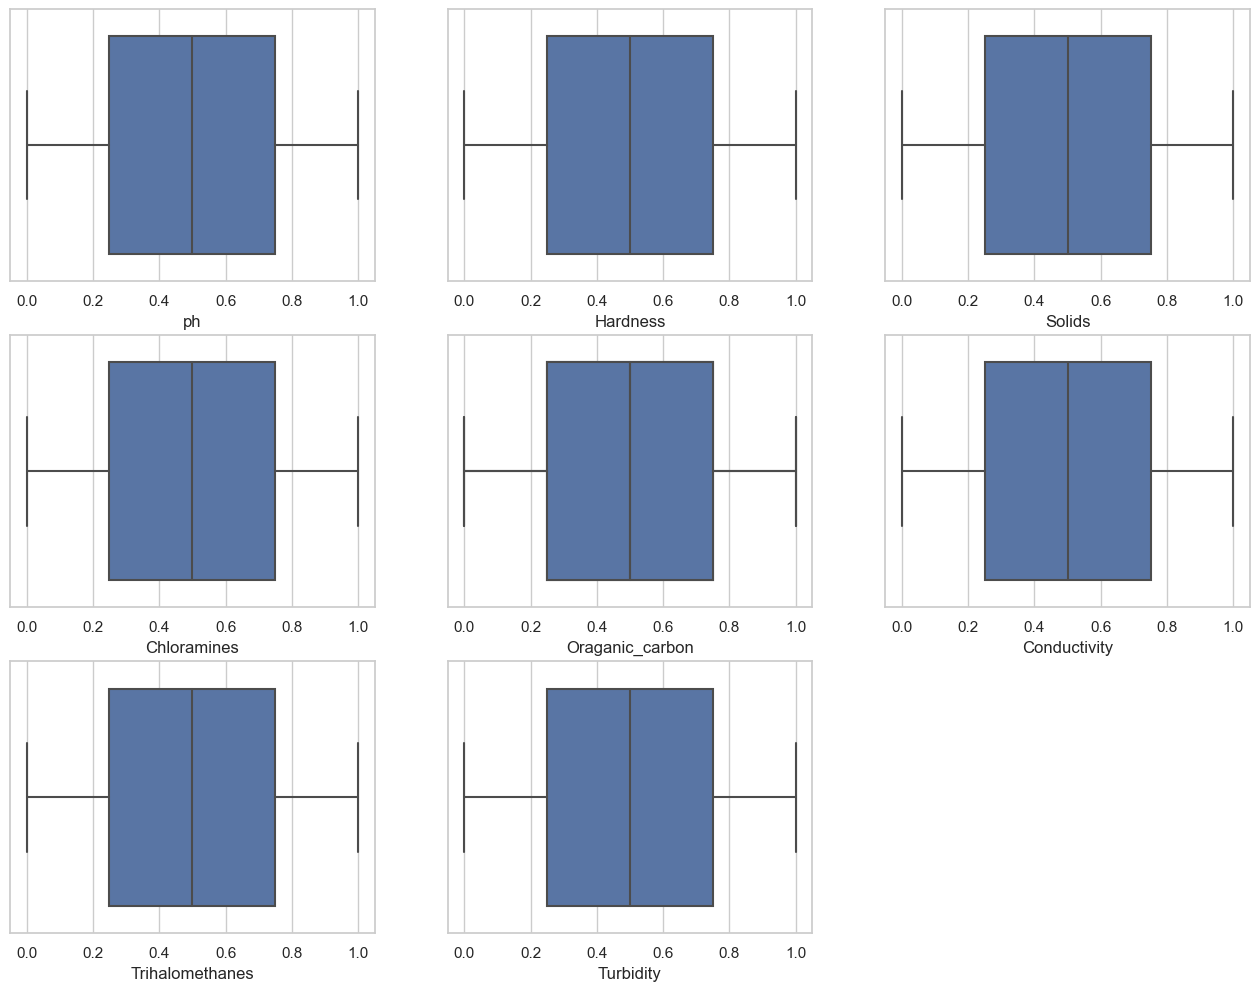

In [356]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x=df_new['ph'],data=df_new)

plt.subplot(3,3,2)
sns.boxplot(x=df_new['Hardness'],data=df_new)

plt.subplot(3,3,3)
sns.boxplot(x=df_new['Solids'], data=df_new)

plt.subplot(3,3,4)
sns.boxplot(x=df_new['Chloramines'],data=df_new)

plt.subplot(3,3,5)
sns.boxplot(x=df_new['Sulfate'],data=df_new)

plt.subplot(3,3,6)
sns.boxplot(x=df_new['Conductivity'],data=df_new)

plt.subplot(3,3,5)
sns.boxplot(x=df_new['Oraganic_carbon'],data=df_new)

plt.subplot(3,3,7)
sns.boxplot(x=df_new['Trihalomethanes'],data=df_new)

plt.subplot(3,3,8)
sns.boxplot(x=df_new['Turbidity'],data=df_new)

plt.show()


In [357]:
# Checking for duplicate values
df.duplicated().any()

False

### checking for the disribution of dataset

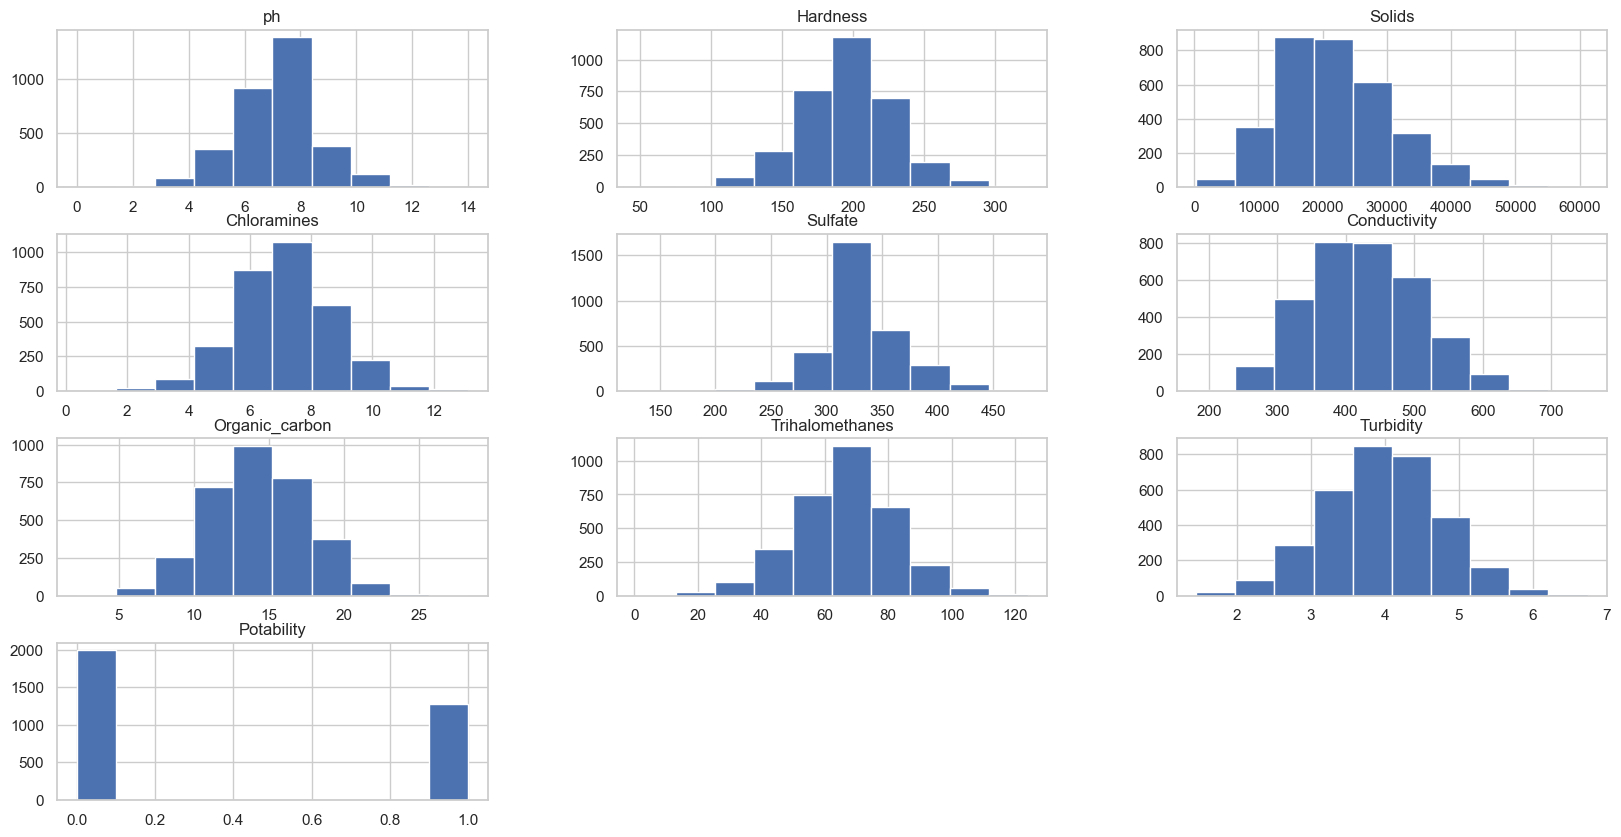

In [358]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

### Bivariate analysis

In [359]:
fig = px.scatter(df,x= 'ph', y= 'Sulfate',color ='Potability', template='plotly_dark')
fig.show()

In [360]:
fig = px.scatter(df,x= 'Organic_carbon', y= 'Hardness',color ='Potability', template='plotly_dark')
fig.show()

### Target varaible

In [236]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

In [237]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

Potability
0    1998
1    1278
Name: count, dtype: int64


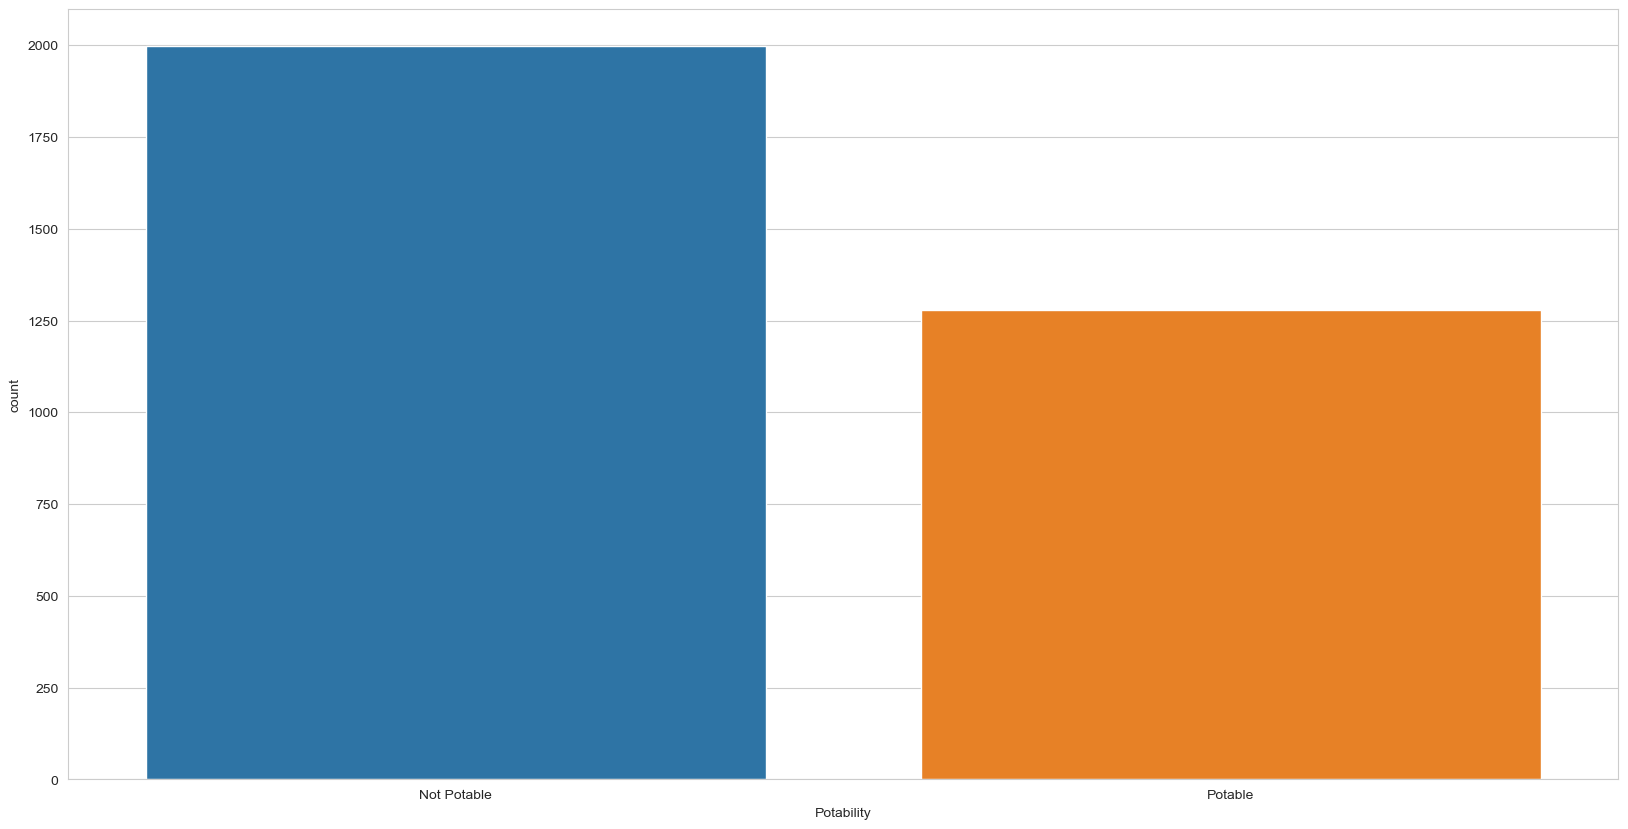

In [238]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

### Multivaraites analysis

###### Correlation Between Variables

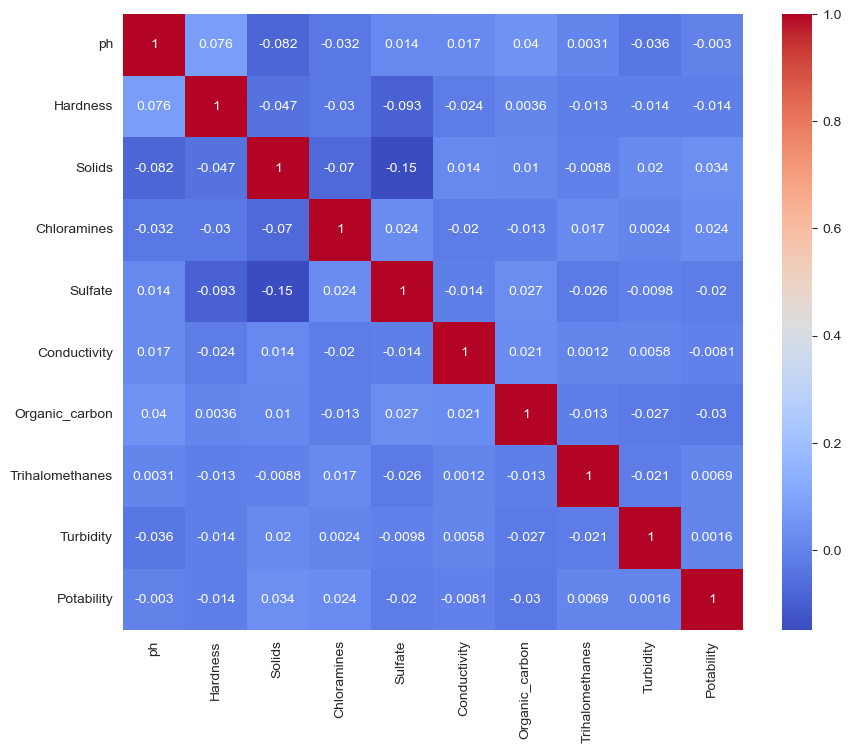

In [239]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.show()

 Degree of Correlation
- Strong : 0.50 - 1.00
- Medium : 0.30 - 0.49
- Small : < + 0.29

- All of variable have correlation with y varible (potability), but the degree correlation are vary from negative to positvie correlation  and there are no variable that have a strong correlation with potability.

-

- Variables that have small and positive correlation with potability are : solid(+), chloramines(+), Trihalomethane(+) and Turbidity (+).rest of the variables are too small andnegatively correlated with potbility of water 

In [240]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.092833
ph        Solids            0.082004
Hardness  ph                0.075760
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.040240
dtype: float64

### Analysis between numeric features

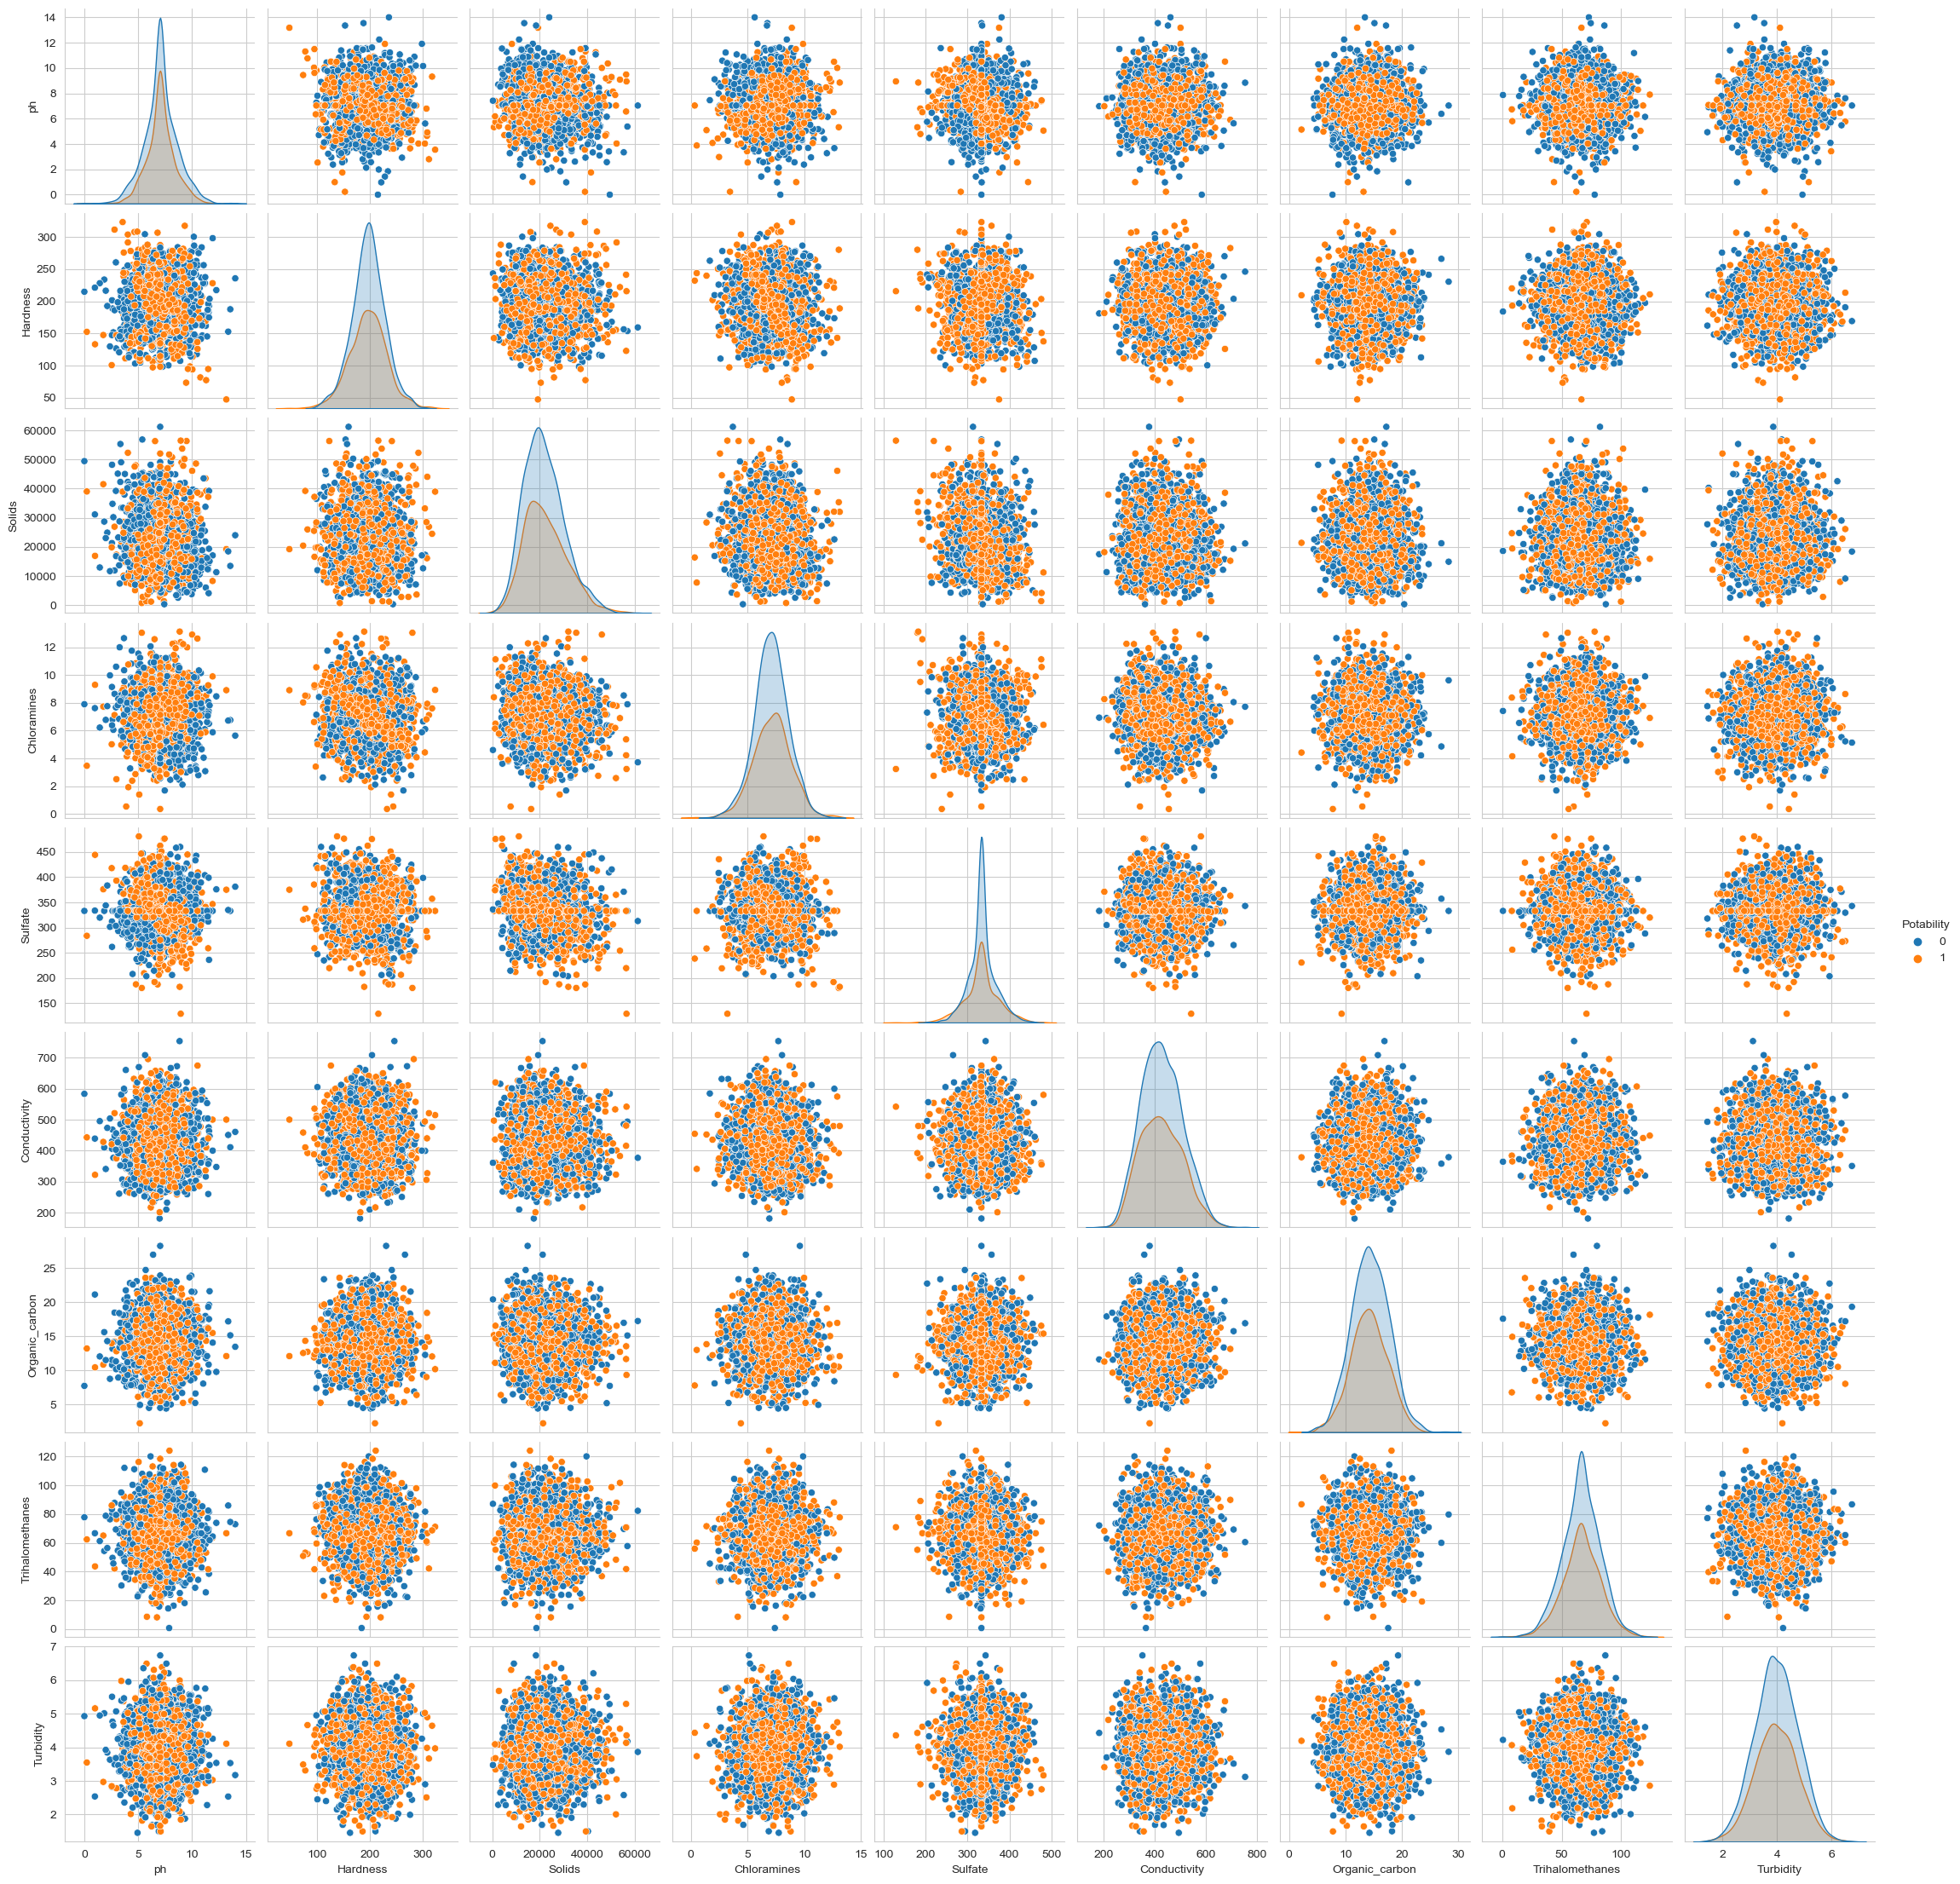

In [241]:
sns.pairplot(df, hue="Potability")
plt.show()

In [242]:
skew_val = df.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.041266
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.027278
Hardness          -0.039342
Trihalomethanes   -0.087289
dtype: float64

- Using pandas skew function to check the correlation between the values.
- Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

### Data preprocessing

###### splitting the data

In [243]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [244]:
X.shape, y.shape

((3276, 9), (3276,))

In [245]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [246]:
X = scaler.fit_transform(X)
X

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

In [301]:
# import train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Modeling

#### Using Decision Tree Classifier¶

In [302]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [303]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [304]:
# Making Prediction
y_pred_dt = model_dt.predict(X_test)

In [305]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, y_pred_dt)
print(dt)

0.6451016635859519


In [306]:
model_dt.classes_

array([0, 1], dtype=int64)

In [307]:
cm3 =confusion_matrix(y_test,y_pred_dt, labels =model_dt.classes_)

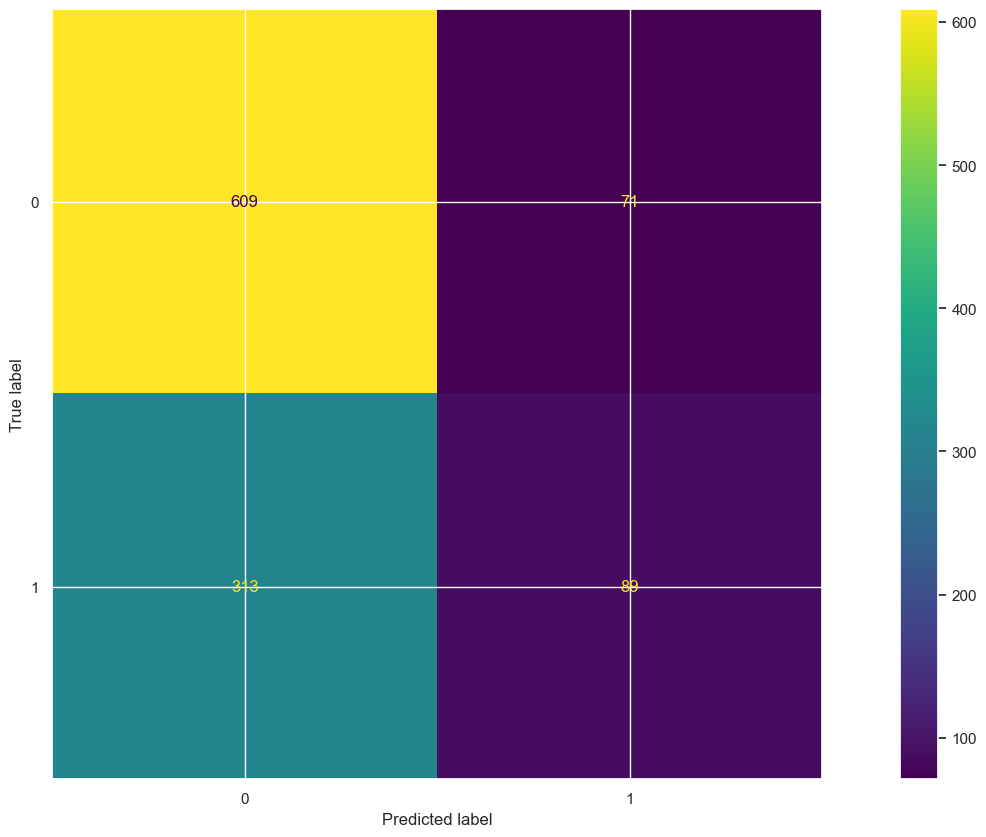

In [308]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['0', '1'])
cm_disp.plot()
plt.show()

In [309]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("recall score",recall_score(y_test, y_pred_dt))
print("precision score", precision_score(y_test,y_pred_dt))
print("f1 score",f1_score(y_test,y_pred_dt))

recall score 0.22139303482587064
precision score 0.55625
f1 score 0.3167259786476868


- These metrics help to assess different aspects of a classification model's performance. Precision focuses on the accuracy of positive predictions, recall emphasizes the ability to capture all positive instances, and F1 score balances the two, providing a comprehensive evaluation. The choice of which metric to prioritize depends on the specific requirements and goals of the application.

- Macro averages are useful for treating each group equally. It calculate precision, recall, or F1-score for each class separately and then take the macro average to get an overall performance.
- while weighted averages allow you to account for the influence of each group's size or importance.
- The choice between these methods depends on the context of the analysis and the specific goals of the calculation.

In [310]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



## Using XGBoost Classifier

In [311]:
from xgboost import XGBClassifier

In [312]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [313]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [314]:
# Making Prediction
y_pred_xgb = model_xgb.predict(X_test)

In [315]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, y_pred_xgb)
print(xgb)

0.6608133086876156


In [316]:
model_xgb.classes_

array([0, 1])

In [317]:
cm =confusion_matrix(y_test,y_pred_xgb, labels =model_xgb.classes_)

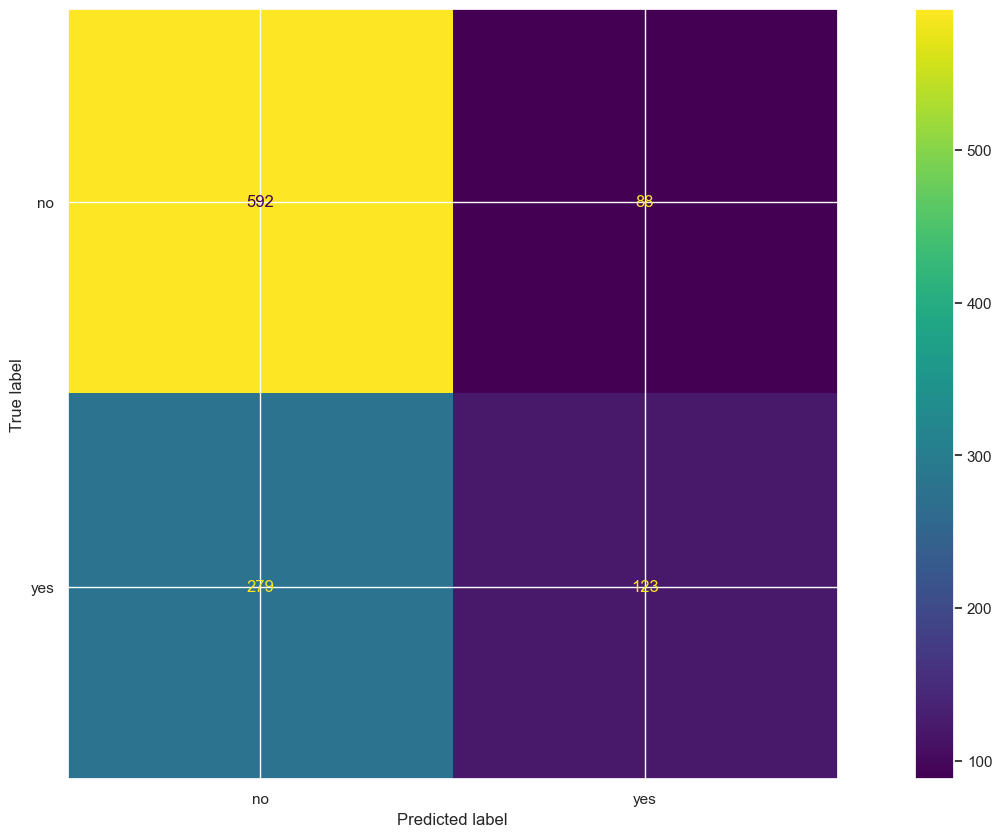

In [318]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
cm_disp.plot()
plt.show()

In [319]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("recall score",recall_score(y_test, y_pred_xgb))
print("precision score", precision_score(y_test,y_pred_xgb))
print("f1 score",f1_score(y_test,y_pred_xgb))

recall score 0.30597014925373134
precision score 0.5829383886255924
f1 score 0.401305057096248


In [320]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       680
           1       0.58      0.31      0.40       402

    accuracy                           0.66      1082
   macro avg       0.63      0.59      0.58      1082
weighted avg       0.64      0.66      0.63      1082

